## Help your hedge fund manager!

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

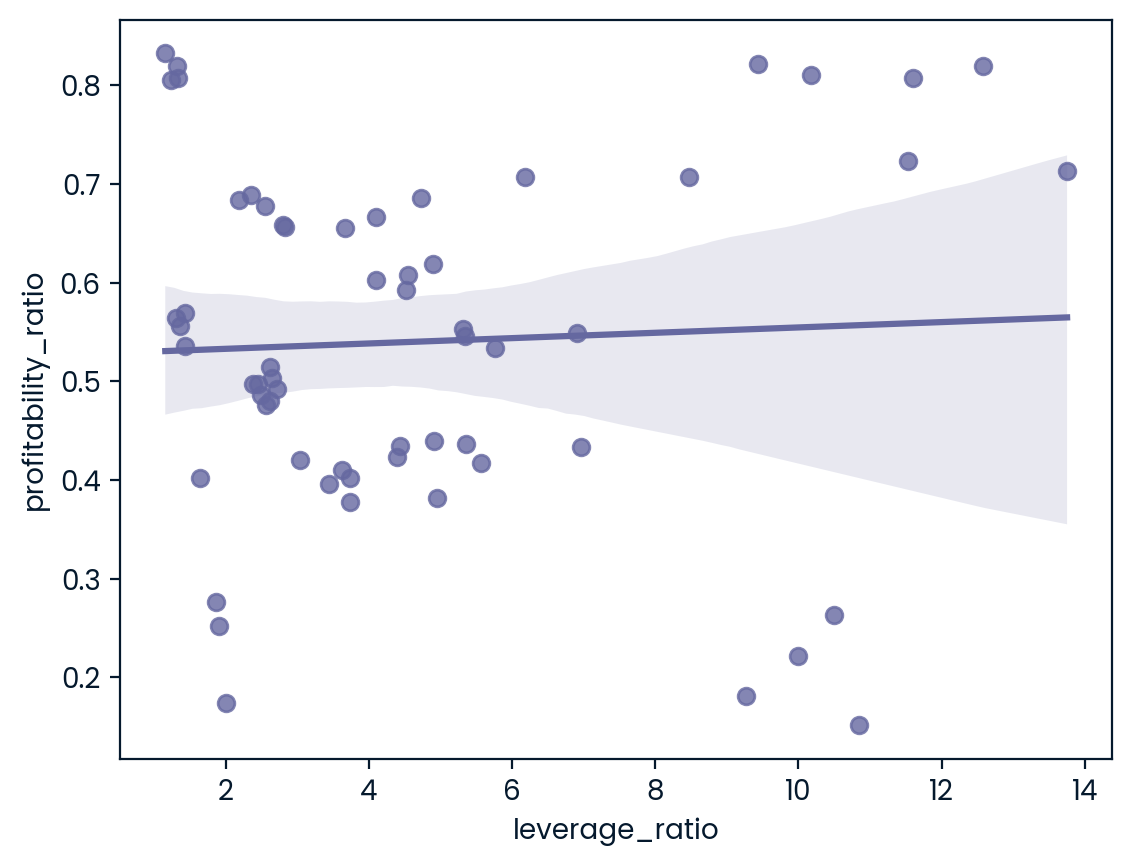

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100
# data import 
bal = pd.read_excel("data/Balance_Sheet.xlsx", index_col=0)
inc = pd.read_excel("data/Income_Statement.xlsx", index_col=0)

# merge df 
merged = bal.merge(inc)

# debt-to-equity ratio = equity multiplier ratio
df_ratios = pd.DataFrame()
df_ratios["leverage_ratio"] = merged["Total Assets"] / merged["Total Stockholder Equity"]

# gross margin ratio = operating margin ratio
df_ratios["profitability_ratio"] = (merged["Total Revenue"] - merged["Cost Of Goods Sold"]) / merged["Total Revenue"]

# avg ratio grouped
merged["profitability_ratio"] = df_ratios["profitability_ratio"]
merged["leverage_ratio"] = df_ratios["leverage_ratio"]
df = merged[["comp_type", "leverage_ratio", "profitability_ratio"]]
lowest_profitability = df.pivot_table(index="comp_type", values="profitability_ratio").nsmallest(1, "profitability_ratio").index[0]
highest_leverage = df.pivot_table(index="comp_type", values="leverage_ratio").nlargest(1, "leverage_ratio").index[0]

# relationship between leverage_ratio & profitability_ratio in real estate comps
sns.regplot(data=df, x="leverage_ratio", y="profitability_ratio")
plt.show()
relationship = "positive"